In [3]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

In [19]:

# import as Dataframe
df=pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv',parse_dates=['date'],index_col='date')
df.reset_index(inplace=True) #đặt lại chỉ mục dùng lệnh reset_index
#parse_dates=['date'] sẽ định dạng cột date thành kiểu dl ngày tháng
#index_col='date' đặt cột 'date' làm mục index của dữ liệu

In [20]:
df

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869
...,...,...
199,2008-02-01,21.654285
200,2008-03-01,18.264945
201,2008-04-01,23.107677
202,2008-05-01,22.912510


In [21]:
#prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years =df['year'].unique() # lấy danh sách các giá trị duy nhất trong cột 'year' của DataFrame và gán vào biến years.

In [22]:
df

,date,value,year,month
0,1991-07-01,3.526591,1991,Jul
1,1991-08-01,3.180891,1991,Aug
2,1991-09-01,3.252221,1991,Sep
3,1991-10-01,3.611003,1991,Oct
4,1991-11-01,3.565869,1991,Nov
...,...,...,...,...
199,2008-02-01,21.654285,2008,Feb
200,2008-03-01,18.264945,2008,Mar
201,2008-04-01,23.107677,2008,Apr
202,2008-05-01,22.912510,2008,May


In [26]:
# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)



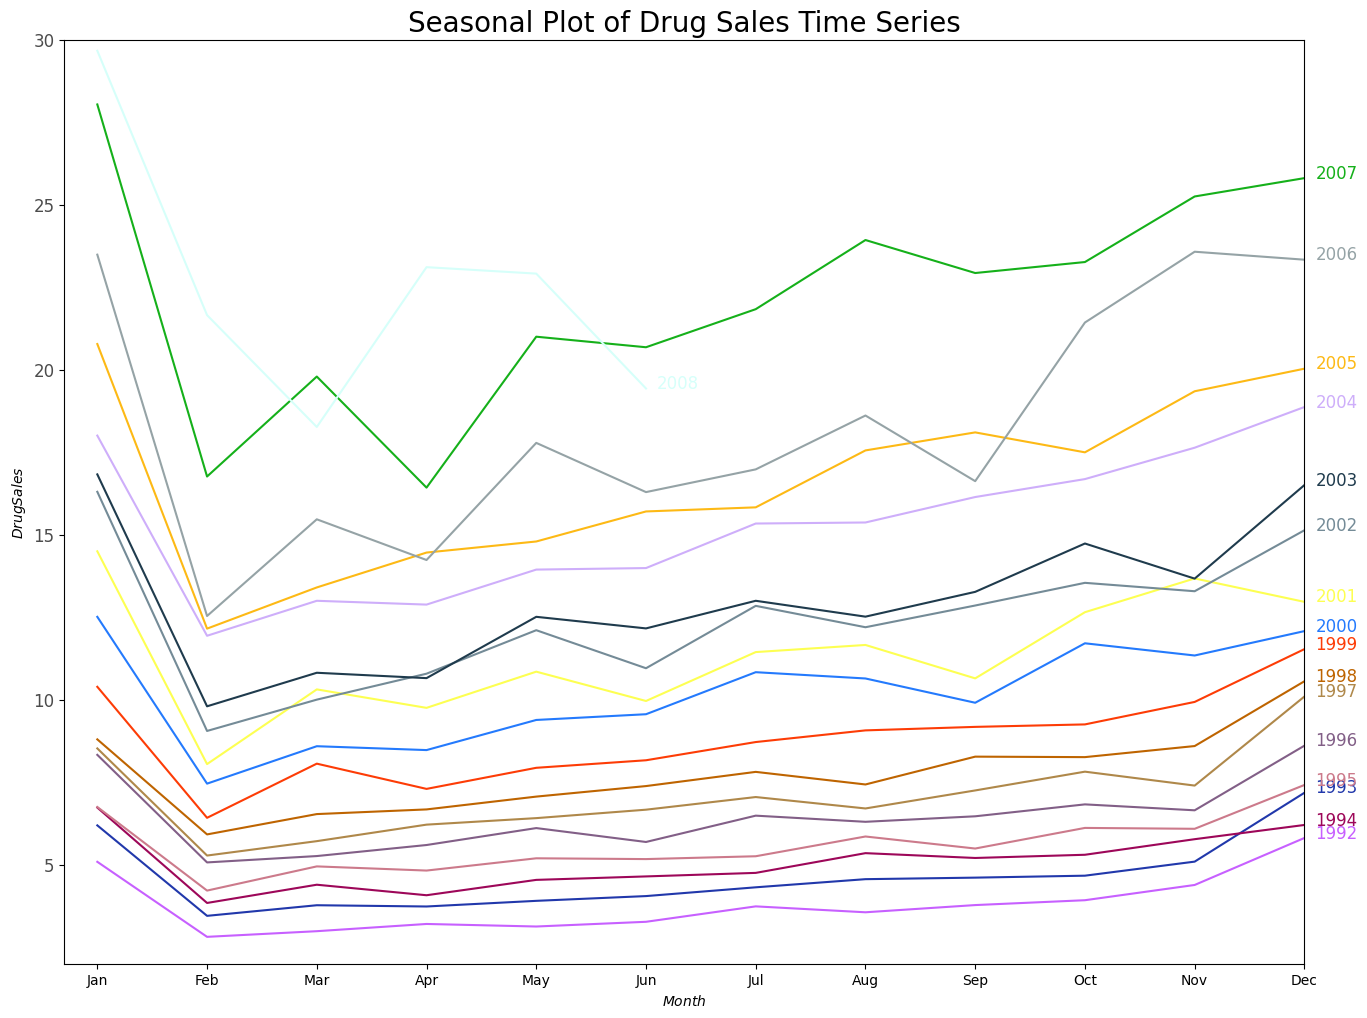

In [29]:
#draw plot
plt.figure(figsize=(16,12),dpi=100)
for i, y in enumerate(years):
    if i > 0:
        plt.plot('month','value',data=df.loc[df.year == y,:],color=mycolors[i],label=y)
        plt.text(df.loc[df.year==y,:].shape[0]-.9,df.loc[df.year==y,'value'][-1:].values[0],y,fontsize=12,color=mycolors[i])
# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
plt.show()                                            


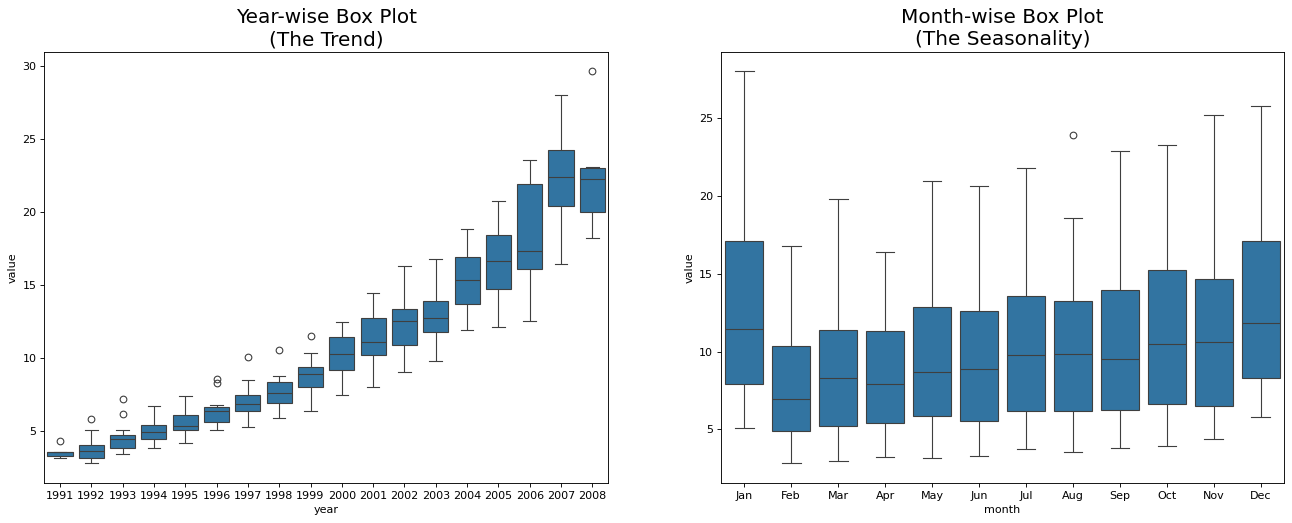

In [32]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='value', data=df, ax=axes[0])
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

